In [1]:
"""
Author https://github.com/boguss1225
Reference : https://github.com/calmisential/TensorFlow2.0_Image_Classification
"""
from __future__ import absolute_import, division, print_function
import tensorflow as tf
import pandas as pd
import config
from utils.test_single_image import test_single_image
from utils.evaluate import eval_model
from utils.prepare_data import get_datasets
from utils.pretrained_models import pretrained_model
import matplotlib.pyplot as plt
import config

2023-01-06 16:04:43.237437: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-06 16:04:44.105618: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/cuda/lib64
2023-01-06 16:04:44.105681: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/cuda/lib64
2023-01-06 16:04:44.105686: W tensorflow/c

In [2]:
# SELECT GPU
import os
os.environ["CUDA_VISIBLE_DEVICES"]="1"

In [3]:
# SELECT MODEL

available_models=["Xception",
                  "EfficientNetB0", "EfficientNetB1", "EfficientNetB2",
                  "EfficientNetB3", "EfficientNetB4", "EfficientNetB5",
                  "EfficientNetB6", "EfficientNetB7",
                  "EfficientNetV2B0", "EfficientNetV2B1",
                  "EfficientNetV2B2", "EfficientNetV2B3",
                  "EfficientNetV2S", "EfficientNetV2M", "EfficientNetV2L",
                  "VGG16","VGG19",
                  "DenseNet121", "DenseNet169", "DenseNet201",
                  "NASNetLarge","NASNetMobile",
                  "InceptionV3","InceptionResNetV2"
                  ]

def get_model():
    model = pretrained_model(model_name="EfficientNetB0",
                            load_weight=None)

    model.compile(loss=tf.keras.losses.categorical_crossentropy,
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
                  metrics=['accuracy', # add more metrics if you want
                            tf.keras.metrics.AUC(),
                            tf.keras.metrics.Precision(),
                            tf.keras.metrics.Recall(),
                            ])
    return model

In [4]:
# GPU settings
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
# LOAD DATA
train_generator, valid_generator, test_generator, \
train_num, valid_num, test_num = get_datasets()

Found 500 images belonging to 5 classes.
Found 125 images belonging to 5 classes.
Found 60 images belonging to 5 classes.


In [6]:
"""
Apply image data augmentation in 'utils.prepare_data.py' manually
"""

"\nApply image data augmentation in 'utils.prepare_data.py' manually\n"

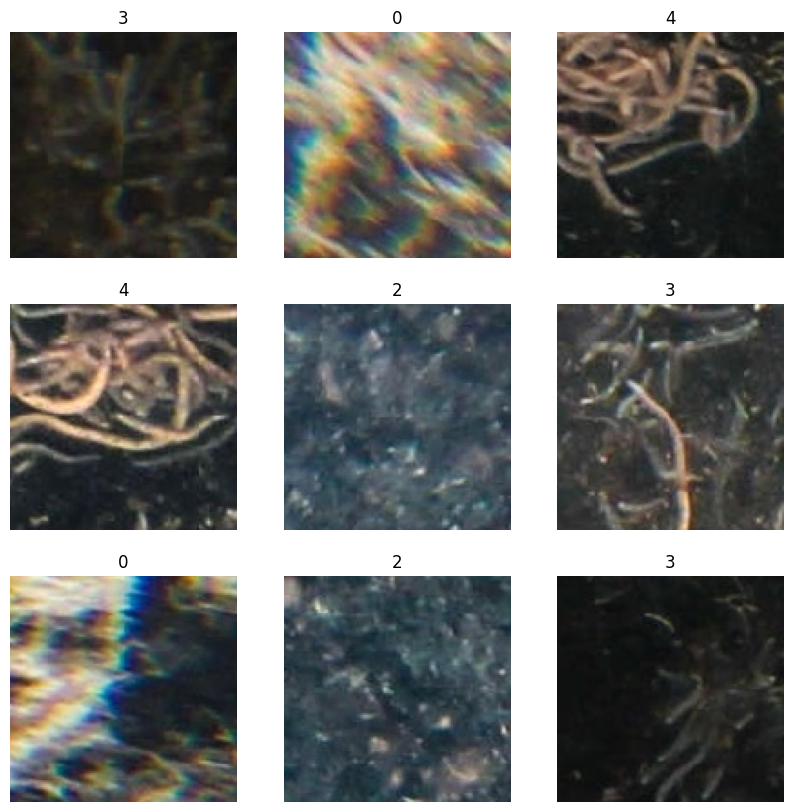

In [7]:
"""
## Visualize the data after augmentaion
Here are the first 9 images in the training dataset. 
Label 0 : "worm"
Label 1 : "vegetation-1"
"""
if config.BATCH_SIZE > 9 :
    range_val = 9
else :
    range_val = config.BATCH_SIZE

plt.figure(figsize=(10, 10))
for i in range(range_val):
    ax = plt.subplot(3, 3, i + 1)
    img, label = train_generator.next()
    plt.imshow(img[0].astype("uint8"))
    plt.title(label[0].argmax())
    plt.axis("off")

In [8]:
"""
Callbacks
"""

# tensorboard = tf.keras.callbacks.TensorBoard(log_dir='log')

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=config.model_dir+config.model_save_name+".keras",
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True
)

early_stop_callback = tf.keras.callbacks.EarlyStopping(
    monitor="loss",
    patience=50,
    restore_best_weights=True
)

callbacks = [
#     tensorboard, 
    model_checkpoint_callback, 
    early_stop_callback
]

2023-01-06 16:05:17.018951: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-06 16:05:17.463074: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 43654 MB memory:  -> device: 0, name: NVIDIA A40, pci bus id: 0000:81:00.0, compute capability: 8.6


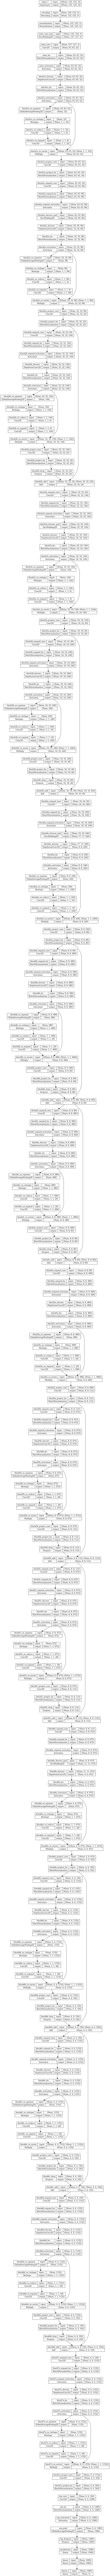

In [9]:
model = get_model()
tf.keras.utils.plot_model(model, show_shapes=True)

In [10]:
"""
Train the model
"""
# mkdir for model save path
if not os.path.exists(config.model_dir):
    os.makedirs(config.model_dir)
    
history = model.fit(train_generator,
                    epochs=1000,
                    steps_per_epoch=train_num // config.BATCH_SIZE,
                    validation_data=valid_generator,
                    validation_steps=valid_num // config.BATCH_SIZE,
                    callbacks=callbacks)

Epoch 1/1000


2023-01-06 16:05:38.131060: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/block2b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2023-01-06 16:05:40.861324: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8600
2023-01-06 16:05:41.494968: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-01-06 16:05:41.554113: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7f06340132d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-01-06 16:05:41.554151: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA A40, Compute Capability 8.6
2023-01-06 16:05:41.559064: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] dis

3/3 [==============================] - 33s 300ms/step - loss: 1.6065 - accuracy: 0.2151 - auc: 0.5099 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 2/1000
3/3 [==============================] - 1s 178ms/step - loss: 1.5565 - accuracy: 0.2995 - auc: 0.6064 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 3/1000
3/3 [==============================] - 1s 173ms/step - loss: 1.5212 - accuracy: 0.3280 - auc: 0.6425 - precision: 0.5867 - recall: 0.1183
Epoch 4/1000
3/3 [==============================] - 1s 172ms/step - loss: 1.3935 - accuracy: 0.3844 - auc: 0.7272 - precision: 0.6667 - recall: 0.1559
Epoch 5/1000
3/3 [==============================] - 1s 146ms/step - loss: 1.4496 - accuracy: 0.3118 - auc: 0.6873 - precision: 0.6026 - recall: 0.1263
Epoch 6/1000
3/3 [==============================] - 1s 151ms/step - loss: 1.4291 - accuracy: 0.3468 - auc: 0.7058 - precision: 0.4857 - recall: 0.1371
Epoch 7/1000
3/3 [==============================] - 1s 171ms/step - loss: 1.3688 - accurac

3/3 [==============================] - 1s 146ms/step - loss: 0.8725 - accuracy: 0.5780 - auc: 0.8866 - precision: 0.5828 - recall: 0.4543
Epoch 24/1000
3/3 [==============================] - 1s 151ms/step - loss: 0.8346 - accuracy: 0.5699 - auc: 0.8904 - precision: 0.5793 - recall: 0.4516
Epoch 25/1000
3/3 [==============================] - 1s 151ms/step - loss: 0.8112 - accuracy: 0.5885 - auc: 0.8960 - precision: 0.5852 - recall: 0.5547
Epoch 26/1000
3/3 [==============================] - 1s 145ms/step - loss: 0.9183 - accuracy: 0.5806 - auc: 0.8820 - precision: 0.5758 - recall: 0.5511
Epoch 27/1000
3/3 [==============================] - 1s 153ms/step - loss: 0.8467 - accuracy: 0.5703 - auc: 0.8935 - precision: 0.6192 - recall: 0.3854
Epoch 28/1000
3/3 [==============================] - 1s 146ms/step - loss: 0.9302 - accuracy: 0.5511 - auc: 0.8707 - precision: 0.5500 - recall: 0.5323
Epoch 29/1000
3/3 [==============================] - 1s 148ms/step - loss: 0.8477 - accuracy: 0.5699 -

3/3 [==============================] - 1s 154ms/step - loss: 0.6829 - accuracy: 0.6589 - auc: 0.9283 - precision: 0.7003 - recall: 0.5234
Epoch 46/1000
3/3 [==============================] - 1s 147ms/step - loss: 0.6994 - accuracy: 0.6694 - auc: 0.9290 - precision: 0.6694 - recall: 0.6640
Epoch 47/1000
3/3 [==============================] - 1s 145ms/step - loss: 0.7276 - accuracy: 0.6452 - auc: 0.9222 - precision: 0.7190 - recall: 0.4677
Epoch 48/1000
3/3 [==============================] - 1s 146ms/step - loss: 0.7164 - accuracy: 0.6720 - auc: 0.9259 - precision: 0.6787 - recall: 0.6586
Epoch 49/1000
3/3 [==============================] - 1s 152ms/step - loss: 0.7680 - accuracy: 0.6172 - auc: 0.9140 - precision: 0.6180 - recall: 0.6068
Epoch 50/1000
3/3 [==============================] - 1s 147ms/step - loss: 0.6993 - accuracy: 0.6909 - auc: 0.9320 - precision: 0.7528 - recall: 0.5484
Epoch 51/1000
3/3 [==============================] - 1s 173ms/step - loss: 0.6658 - accuracy: 0.6747 -

3/3 [==============================] - 1s 151ms/step - loss: 0.7251 - accuracy: 0.6613 - auc: 0.9256 - precision: 0.6704 - recall: 0.6505
Epoch 69/1000
3/3 [==============================] - 1s 155ms/step - loss: 0.8011 - accuracy: 0.6354 - auc: 0.9135 - precision: 0.6436 - recall: 0.6302
Epoch 70/1000
3/3 [==============================] - 1s 151ms/step - loss: 0.7439 - accuracy: 0.6328 - auc: 0.9196 - precision: 0.6385 - recall: 0.6302
Epoch 71/1000
3/3 [==============================] - 1s 147ms/step - loss: 0.7242 - accuracy: 0.6747 - auc: 0.9262 - precision: 0.6813 - recall: 0.6667
Epoch 72/1000
3/3 [==============================] - 1s 151ms/step - loss: 0.8319 - accuracy: 0.6344 - auc: 0.9034 - precision: 0.6454 - recall: 0.6263
Epoch 73/1000
3/3 [==============================] - 1s 150ms/step - loss: 0.7674 - accuracy: 0.6532 - auc: 0.9179 - precision: 0.7091 - recall: 0.5242
Epoch 74/1000
3/3 [==============================] - 1s 152ms/step - loss: 0.7280 - accuracy: 0.7005 -

3/3 [==============================] - 1s 154ms/step - loss: 0.7169 - accuracy: 0.6747 - auc: 0.9262 - precision: 0.6814 - recall: 0.6613
Epoch 91/1000
3/3 [==============================] - 1s 150ms/step - loss: 0.6733 - accuracy: 0.6855 - auc: 0.9336 - precision: 0.6964 - recall: 0.6720
Epoch 92/1000
3/3 [==============================] - 1s 160ms/step - loss: 0.6850 - accuracy: 0.7231 - auc: 0.9362 - precision: 0.7326 - recall: 0.7070
Epoch 93/1000
3/3 [==============================] - 1s 150ms/step - loss: 0.6772 - accuracy: 0.6935 - auc: 0.9356 - precision: 0.6975 - recall: 0.6882
Epoch 94/1000
3/3 [==============================] - 1s 156ms/step - loss: 0.6744 - accuracy: 0.6720 - auc: 0.9325 - precision: 0.6766 - recall: 0.6694
Epoch 95/1000
3/3 [==============================] - 1s 154ms/step - loss: 0.7098 - accuracy: 0.6747 - auc: 0.9288 - precision: 0.6813 - recall: 0.6667
Epoch 96/1000
3/3 [==============================] - 1s 148ms/step - loss: 0.7033 - accuracy: 0.6801 -

Epoch 113/1000
3/3 [==============================] - 1s 154ms/step - loss: 0.6755 - accuracy: 0.7070 - auc: 0.9334 - precision: 0.7054 - recall: 0.7016
Epoch 114/1000
3/3 [==============================] - 1s 145ms/step - loss: 0.6457 - accuracy: 0.7124 - auc: 0.9401 - precision: 0.7166 - recall: 0.7070
Epoch 115/1000
3/3 [==============================] - 1s 154ms/step - loss: 0.6476 - accuracy: 0.6875 - auc: 0.9376 - precision: 0.6968 - recall: 0.6823
Epoch 116/1000
3/3 [==============================] - 1s 152ms/step - loss: 0.5699 - accuracy: 0.7005 - auc: 0.9495 - precision: 0.7548 - recall: 0.6094
Epoch 117/1000
3/3 [==============================] - 1s 182ms/step - loss: 0.5613 - accuracy: 0.7188 - auc: 0.9484 - precision: 0.7927 - recall: 0.5677
Epoch 118/1000
3/3 [==============================] - 1s 153ms/step - loss: 0.6658 - accuracy: 0.6797 - auc: 0.9363 - precision: 0.7482 - recall: 0.5339
Epoch 119/1000
3/3 [==============================] - 1s 156ms/step - loss: 0.6259

3/3 [==============================] - 1s 148ms/step - loss: 0.7351 - accuracy: 0.6828 - auc: 0.9260 - precision: 0.7179 - recall: 0.6022
Epoch 136/1000
3/3 [==============================] - 1s 152ms/step - loss: 0.6342 - accuracy: 0.7231 - auc: 0.9423 - precision: 0.7337 - recall: 0.6371
Epoch 137/1000
3/3 [==============================] - 1s 150ms/step - loss: 0.6475 - accuracy: 0.6694 - auc: 0.9363 - precision: 0.7632 - recall: 0.5457
Epoch 138/1000
3/3 [==============================] - 1s 146ms/step - loss: 0.6014 - accuracy: 0.7124 - auc: 0.9468 - precision: 0.7162 - recall: 0.7124
Epoch 139/1000
3/3 [==============================] - 1s 152ms/step - loss: 0.6290 - accuracy: 0.7177 - auc: 0.9422 - precision: 0.7216 - recall: 0.7177
Epoch 140/1000
3/3 [==============================] - 1s 153ms/step - loss: 0.5537 - accuracy: 0.7161 - auc: 0.9514 - precision: 0.7584 - recall: 0.6458
Epoch 141/1000
3/3 [==============================] - 1s 153ms/step - loss: 0.6379 - accuracy: 0.

3/3 [==============================] - 1s 158ms/step - loss: 0.5548 - accuracy: 0.7448 - auc: 0.9553 - precision: 0.7448 - recall: 0.7448
Epoch 158/1000
3/3 [==============================] - 1s 150ms/step - loss: 0.5847 - accuracy: 0.7204 - auc: 0.9470 - precision: 0.7197 - recall: 0.7177
Epoch 159/1000
3/3 [==============================] - 1s 156ms/step - loss: 0.5987 - accuracy: 0.6745 - auc: 0.9437 - precision: 0.6762 - recall: 0.6745
Epoch 160/1000
3/3 [==============================] - 1s 157ms/step - loss: 0.5611 - accuracy: 0.6953 - auc: 0.9489 - precision: 0.6963 - recall: 0.6927
Epoch 161/1000
3/3 [==============================] - 1s 155ms/step - loss: 0.5554 - accuracy: 0.7204 - auc: 0.9510 - precision: 0.7197 - recall: 0.7177
Epoch 162/1000
3/3 [==============================] - 1s 154ms/step - loss: 0.5615 - accuracy: 0.7258 - auc: 0.9523 - precision: 0.7270 - recall: 0.7231
Epoch 163/1000
3/3 [==============================] - 1s 159ms/step - loss: 0.5887 - accuracy: 0.

In [11]:
# save the whole model
model.save(config.model_dir+config.model_save_name+".h5")

In [12]:
hist_df = pd.DataFrame(history.history)
with open(config.model_dir+"train_history.csv", mode='w') as f:
    hist_df.to_csv(f)

In [13]:
# Evaluation
eval_model(model)

Found 500 images belonging to 5 classes.
Found 125 images belonging to 5 classes.
Found 60 images belonging to 5 classes.


/home/mirap/.conda/envs/tf2/lib/python3.8/site-packages/keras/utils/generic_utils.py:239: RuntimeWarning: divide by zero encountered in log10
  numdigits = int(np.log10(self.target)) + 1


OverflowError: cannot convert float infinity to integer

In [14]:
# detect samples
print(config.test_image_path)
test_single_image(config.test_image_path, model)

/home/mirap/0_DATABASE/IMAS_Salmon/6_Salmon_Yolo_Balanced/test/4/untitled-34_2693_1319_4.jpg


3